# # In-game data predictions experiments (supportive regression on aggregated dataset)

## Extracting the best features via RF

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('processed_dataset.csv')

columns_to_drop = ['match_id']

df = df.drop(columns=columns_to_drop)

X = df.drop(columns=['has_team_won'])
y = df['has_team_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (5243, 30)
Shape of X_test: (1311, 30)
Shape of y_train: (5243,)
Shape of y_test: (1311,)


In [3]:
rf_model = RandomForestClassifier(n_estimators=75, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       660
        True       0.98      0.98      0.98       651

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311


98% precision is more than expected, since we provided the model with ALL the possible data. That will do perfect to extract our features

Top 10 Most Important Features:
                                        Feature  Importance
21                         team_players_net_sum    0.262018
25                          team_hero_lvls_mean    0.183441
18                         team_players_gpm_sum    0.151180
17                         team_players_xpm_sum    0.110623
23                team_player_deaths_number_sum    0.074608
24                team_players_kills_number_sum    0.061265
1              team_heroes_winrate_overall_mean    0.049395
22              team_players_assists_number_sum    0.047842
20                    team_players_lasthits_sum    0.013255
9   team_heroes_pick_confidence_score_total_sum    0.004333


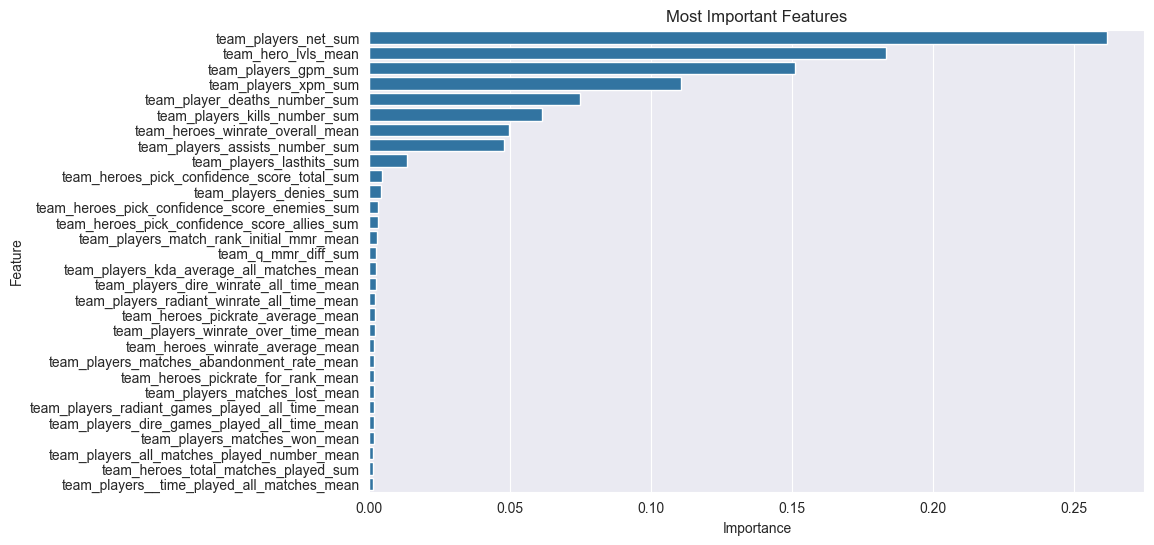

In [4]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Most Important Features')
plt.show()


### Experiments with top-5 best features (one result provided)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

columns_to_drop = ['has_team_won', 'team_players_xpm_sum', 'team_players_denies_sum', 'team_players_lasthits_sum',
                   'team_players_assists_number_sum', 'team_players_kills_number_sum', 'team_players_net_sum', 'team_players_gpm_sum', 'team_hero_lvls_mean']

temp_df = df.drop(columns=columns_to_drop)


X = temp_df.drop(columns=['team_player_deaths_number_sum'])  # Features
y = temp_df['team_player_deaths_number_sum']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=80, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 280.0279179776888
R-squared: 0.27522696789264167


Unfortunately, just like with initial dataset data (look for supportive_regression.ipynb notebook), none of the results has proven to be any good for further usage. (LinearRegression and RandomForest models tested)

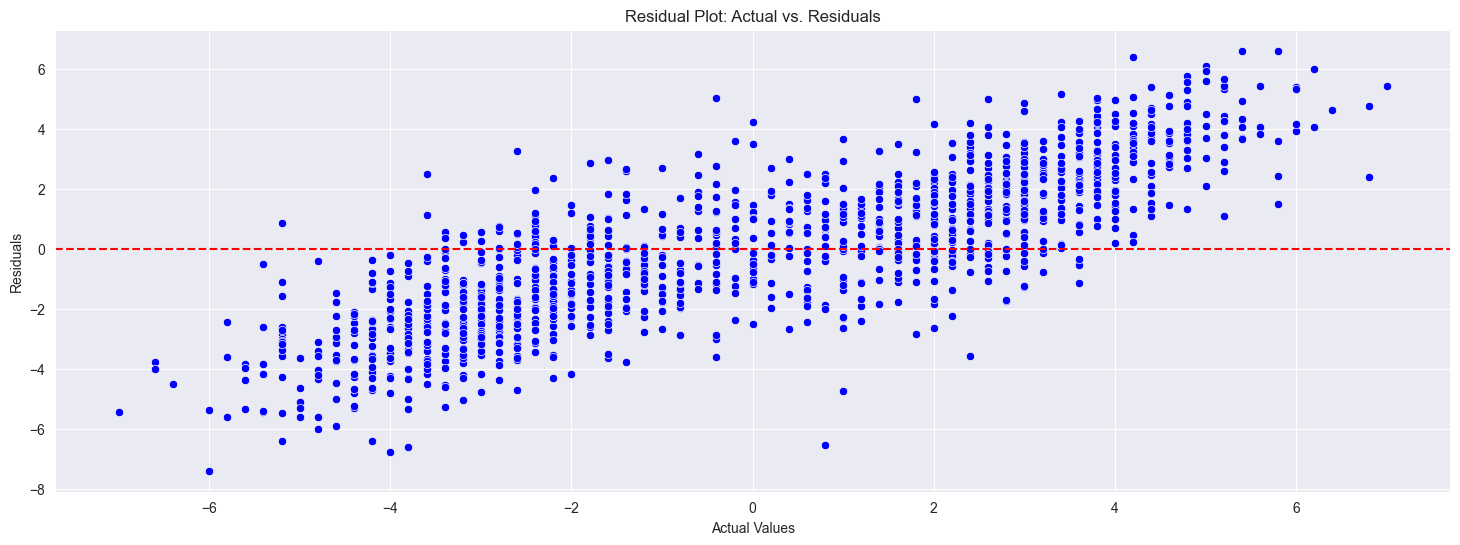

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(18, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residual Plot: Actual vs. Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


## Conclusion

Neither regression on the initial dataset nor the aggregated one has yielded any results one may deem sufficient.